# Predicting NFL Vested Veterans: 3YearsThreshold Classifier

Billie Kim

Casey Ng

Ethan Panal

Data Source: https://www.kaggle.com/datasets/trevyoungquist/2020-nfl-stats-active-and-retired-players

## Objective of Analysis
**Target Audience: NFL Team Managers**

This analysis aims to uncover insights on NFL offensive player career length and predict career longevity based on a player's rookie season. This can provide NFL team managers with valuable information to enhance their roster strategy and manage their salary budget appropriately. Specifically, for players who are "vested veterans," meaning they have played at least 3 NFL seasons, teams are required to provide them with more benefits such as a pension, health insurance, 401K, life insurance, etc. This requires careful planning by teams to budget based on expected career length. Some questions this analysis will help reveal include:
* What are the average career lengths for offensive players?
* Do most rookies who have played in an NFL game and have registered at least one in-game statistic make it at least 3 years in the NFL?
* Which offensive rookie statistics are more correlated with a longer career in the NFL?
* Can a predictive model accurately predict if a rookie will become a vested veteran (at least 3 years in the league)?
* Which type of predictive model is best for predicting longevity for a rookie?


**Dataset:**
This dataset was sourced from Kaggle.com and was scraped from basic and career statistics on the NFL’s official website. The original dataset includes statistics for active players and over 40,000 retired players from 1920 - 2018. The dataset only includes players with statistics on the NFL website, i.e. they have registered at least one in game statistics. For the purposes of this analysis, the missing data for rookies without statistics (Missing data not at random) is not a concern since team managers would only be interested in evaluating career longevity on players that have earned a coach’s trust with enough talent and skill to play in a game.

## Contents
1. [Data Exploration](#1.-Data-Exploration)
2. [Data Wrangling](#2.-Data-Wrangling)
  * [2.1 Merge 1](#2.1-Merge-1)
  * [2.2 Merge 2](#2.2-Merge-2)
3. [Data Cleaning](#3.-Data-Cleaning)
  * [3.1 Height and Weight](#3.1-Height-and-Weight)
  * [3.2 Positions](#3.1-Positions)
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
  * [4.1 Countplot of Target Feature](#4.1-Countplot-of-Target-Feature)
  * [4.2 Distributions of Numerical Variables](#4.2-Distributions-of-Numerical-Variables)
  * [4.3 Feature Correlation Heatmap](#4.3-Feature-Correlation-Heatmap)
  * [4.4 Barplot of NumYearsPlayed by Position](#4.4-Barplot-of-NumYearsPlayed-by-Position)
  * [4.5 Barplot of New Players by Year](#4.5-Barplot-of-New-Players-by-Year)
5. [Preprocessing](#5.-Preprocessing)
  * [5.1 Scale Numerical Features](#5.1-Scale-Numerical-Features)
  * [5.2 Encode Target Feature](#5.2-Encode-Target-Feature)
  * [5.3 Split Train & Test Sets](#5.3-Split-Train-&-Test-Sets)
  * [5.4 Feature Selection](#5.4-Feature-Selection)
6. [Modeling](#6.-Modeling)
  * [6.1 Baseline Accuracy](#6.1-Baseline-Accuracy)
  * [6.2 Machine Learning Algorithm Comparison](#6.2-Machine-Learning-Algorithm-Comparison)
  * [6.3 Random Forest Model](#6.3-Random-Forest-Model)
  * [6.4 Gradient Boosting Model](#6.4-Gradient-Boosting-Model)
  * [6.5 SVC Model](#6.5-SVC-Model)
7. [Performance Metrics Evaluation](#7.-Performance-Metrics-Evaluation)
8. [Modeling Scenario: Active Players](#8.-Modeling-Scenario:-Active-Players)
9. [Conclusion](#9.-Conclusion)
10. [References](#10.-References)

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics, tree, svm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Data Exploration

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read in data files
df_basic = pd.read_csv('/content/Retired_Player_Basic_Stats.csv')
df_rush = pd.read_csv('/content/RetiredPlayer_Rushing_Stats.csv')
df_receive = pd.read_csv('/content/RetiredPlayer_Receiving_Stats.csv')

**Comment:** The data is separated by statistic type. We'll import basic, rushing, and receiving statistics and later join together on the player's ID.

In [4]:
# print top rows of rush df
df_rush.head(5)

,Player_Id,Year,Team,Games_Played,Attempts,Yards,Average,Long,TDs,First_Downs,First_Down_Percentage,Rushes_Over_Twenty_Yards,Rushes_Over_Forty_Yards,Fumbles
0,abdul-karim-al-jabbar,1996,MiamiDolphins,16,307,1116,3.6,29,11,64,20.85,3,0,4
1,abdul-karim-al-jabbar,1997,MiamiDolphins,16,283,892,3.2,22,15,64,22.61,2,0,3
2,abdul-karim-al-jabbar,1998,MiamiDolphins,15,270,960,3.6,45,6,43,15.93,9,2,2
3,abdul-karim-al-jabbar,1999,ClevelandBrowns,13,143,445,3.1,21,1,20,13.99,1,0,0
4,abdul-karim-al-jabbar,2000,IndianapolisColts,1,1,-2,-2,-2,0,0,0,0,0,0


In [5]:
# print top rows of receive df
df_receive.head(5)

,Player_Id,Year,Team,Games_Played,Receptions,Yards,Average,Long,TDs,First_Downs,First_Down_Percentage,Receptions_Over_Twenty_Yards,Receptions_Over_Forty_Yards
0,arrowhead,1923,OorangIndians,4,0,0,0,0,2,0,0,0,0
1,arrowhead,TOTAL,--,4,0,0,0,0,2,0,0,0,0
2,abdul-karim-al-jabbar,1996,MiamiDolphins,16,23,139,6,23,0,6,26.09,1,0
3,abdul-karim-al-jabbar,1997,MiamiDolphins,16,29,261,9,36,1,10,34.48,3,0
4,abdul-karim-al-jabbar,1998,MiamiDolphins,15,21,102,4.9,18,0,3,14.29,0,0


In [6]:
# print top rows of basic df
df_basic.head(5)

,Player_Id,Full_Name,Position,Height,Weight,College,Hall_Of_Fame
0,anderson,Anderson,WB,--,0,No College,False
1,arrowhead,Arrowhead,E,5-7,160,No College,False
2,aaron-adams-2,Aaron Adams,--,--,--,LSU,False
3,aaron-adams,Aaron Adams,OT,6-5,303,Eastern Kentucky,False
4,abdul-karim-al-jabbar,Abdul-Karim al-Jabbar,RB,5-11,205,UCLA,False


**Comment:** Exploring the first few rows of each dataset, the data is mostly numerical performance values but also include numerical physical traits (Height and Weight).

## 2. Data Wrangling

### 2.1 Merge 1

This section merges the rushing and receiving statistics together.

In [7]:
# drop redundant columns
df_receive.drop(columns=['Team','Games_Played'], inplace=True)

# merge on player id and year
df_merge = pd.merge(df_rush, df_receive, on=['Player_Id','Year'], how='inner', suffixes=('_Rush','_Receptions'))

# keep only the 1st record of each player_id: rookie year
df = df_merge.groupby('Player_Id').first()

**Comment:** The two retired player rushing and receiving datasets are joined together on the Player_ID. After merging the datasets, we group by the Player_ID and only select their rookie year or the first row of dataset available for a player. We do this for making longevity predictions later on solely on a player's rookie statistics.

In [8]:
# create new field to calculate the total number of years played : NumYearsPlayed (Since there is a TOTAL row for every player, we subtract by 1)
df['NumYearsPlayed'] = (df_merge.groupby('Player_Id')['Year'].count().values) - 1

# reset dataframe index
df.reset_index(inplace=True)

# create new field from NumYearsPlayed using a threshold of 3 years: 3YearsThreshold
df['3YearsThreshold'] = np.where(df.NumYearsPlayed > 3, 1, 0)

**Comment:** Above we create two variables. One is a continuous variable which is the number of years played based on a count of season records for a player.
The other variable is a boolean called 3YearThreshold and will be used as our output variable. This field is 1 or 0 depending on whether the player last more than 3 years in the league or not. As mentioned earlier, teams have to allocate more budget towards "Vested Veterans" who make it at least 3 years in the NFL.

### 2.2 Merge 2

This sections merges the players basic stats with the rushing and receiving dataframe.

In [9]:
# subset basic stats features
df_basic = df_basic[['Player_Id','Position','Height','Weight']]

# merge dataframes
df = pd.merge(df, df_basic, on='Player_Id', how='inner')

**Comment:** We merge in the third dataset we contains basic information about the player's position, height and weight.

## 3. Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4187 entries, 0 to 4186
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Player_Id                         4187 non-null   object
 1   Year                              4187 non-null   object
 2   Team                              4187 non-null   object
 3   Games_Played                      4187 non-null   object
 4   Attempts                          4187 non-null   object
 5   Yards_Rush                        4187 non-null   object
 6   Average_Rush                      4187 non-null   object
 7   Long_Rush                         4187 non-null   object
 8   TDs_Rush                          4187 non-null   object
 9   First_Downs_Rush                  4187 non-null   object
 10  First_Down_Percentage_Rush        4187 non-null   object
 11  Rushes_Over_Twenty_Yards          4187 non-null   object
 12  Rushes_Over_Forty_Ya

In [11]:
# convert column datatypes to numerics
numeric_cols = ['Games_Played', 'Attempts', 'Yards_Rush',
               'Average_Rush', 'Long_Rush', 'TDs_Rush', 'First_Downs_Rush',
               'First_Down_Percentage_Rush', 'Rushes_Over_Twenty_Yards',
               'Rushes_Over_Forty_Yards', 'Fumbles', 'Receptions', 'Yards_Receptions',
               'Average_Receptions', 'Long_Receptions', 'TDs_Receptions',
               'First_Downs_Receptions', 'First_Down_Percentage_Receptions',
               'Receptions_Over_Twenty_Yards', 'Receptions_Over_Forty_Yards']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [12]:
# check duplicate records
df.duplicated().sum()

0

In [13]:
# check missing values
df.isnull().sum().sort_values(ascending=False)

First_Downs_Rush                    1
Attempts                            1
Yards_Rush                          1
Average_Rush                        1
Long_Rush                           1
TDs_Rush                            1
First_Down_Percentage_Rush          1
Rushes_Over_Twenty_Yards            1
Rushes_Over_Forty_Yards             1
Fumbles                             1
3YearsThreshold                     0
Receptions_Over_Twenty_Yards        0
Receptions_Over_Forty_Yards         0
NumYearsPlayed                      0
Player_Id                           0
First_Downs_Receptions              0
Position                            0
Height                              0
First_Down_Percentage_Receptions    0
Receptions                          0
TDs_Receptions                      0
Long_Receptions                     0
Average_Receptions                  0
Yards_Receptions                    0
Year                                0
Games_Played                        0
Team        

**Comment:** Overall, the dataset is extremely clean. There appears to be a few records with NaN values.

In [14]:
# print rows w/ NaN values
df[df.isna().any(axis=1)]

,Player_Id,Year,Team,Games_Played,Attempts,Yards_Rush,Average_Rush,Long_Rush,TDs_Rush,First_Downs_Rush,...,TDs_Receptions,First_Downs_Receptions,First_Down_Percentage_Receptions,Receptions_Over_Twenty_Yards,Receptions_Over_Forty_Yards,NumYearsPlayed,3YearsThreshold,Position,Height,Weight
3970,tre-madden,2017,SeattleSeahawks,8,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,50.0,1,1,2,0,FB,6-0,235


In [15]:
# replace NaN value with 0
df = df.fillna(0)

**Comment:** Tre Madden is the player in the dataset with NaN rushing values. We replaced the NaN values with 0's for this record. Reasoning: our domain knowledge and expertise in American Football.

### 3.1 Height and Weight

**Comment:** We found missing data that neeeded to be filled in. Below are cleaning steps for Height and Weight to ensure the data is in a numerical format valid for data processing.

In [16]:
# replace '--' with NaN
df[['Height','Weight']] = df[['Height','Weight']].replace('--', np.NaN)

# height_conversion function: convert ft-in to total inches
def height_conversion(height):
  if height is np.NaN:
    return height
  else:
    feet,inch = height.split('-')
    total = 12*int(feet) + int(inch)
    return total

# apply height_conversion function to height column
df['Height'] = df['Height'].apply(height_conversion)

# convert datatypes to numeric for height and weight
df[['Height','Weight']] = df[['Height','Weight']].apply(pd.to_numeric, errors='coerce')

**Comment:** Exploring null values, it looks like one player still has a record missing height and weight.

In [17]:
# sanity check: print rows w/ NaN values
df[df.isna().any(axis=1)]

,Player_Id,Year,Team,Games_Played,Attempts,Yards_Rush,Average_Rush,Long_Rush,TDs_Rush,First_Downs_Rush,...,TDs_Receptions,First_Downs_Receptions,First_Down_Percentage_Receptions,Receptions_Over_Twenty_Yards,Receptions_Over_Forty_Yards,NumYearsPlayed,3YearsThreshold,Position,Height,Weight
4024,vernon-davis,2006,SanFrancisco49ers,10,2.0,5.0,2.5,9.0,0.0,0.0,...,3,9,45.0,5,2,14,1,TE,NaN,NaN


In [18]:
# googled vernon davis height and weight in 2006: ht=6'3, wt=253
df.loc[df['Player_Id'] == 'vernon-davis', 'Height'] = 75
df.loc[df['Player_Id'] == 'vernon-davis', 'Weight'] = 253

df[df['Player_Id'] == 'vernon-davis']

,Player_Id,Year,Team,Games_Played,Attempts,Yards_Rush,Average_Rush,Long_Rush,TDs_Rush,First_Downs_Rush,...,TDs_Receptions,First_Downs_Receptions,First_Down_Percentage_Receptions,Receptions_Over_Twenty_Yards,Receptions_Over_Forty_Yards,NumYearsPlayed,3YearsThreshold,Position,Height,Weight
4024,vernon-davis,2006,SanFrancisco49ers,10,2.0,5.0,2.5,9.0,0.0,0.0,...,3,9,45.0,5,2,14,1,TE,75.0,253.0


**Comment:** The lone player with null Height and Weight values is Vernon Davis of the 2006 49ers. When you're dealing with large amounts of null values, web scraping to find datapoints of missing values isn't ideal/optimal; however, since we are only dealing with  only 1 record, it can be an exception in this case. We enter in Vernon's height and weight based on data found on footballsfuture.com.

### 3.2 Positions

In [19]:
# Exploring football positions in dataset
df.Position.unique()

array(['RB', 'WR', 'QB', 'FB', 'TE', 'HB', 'WB', 'DB', 'TB', 'BB', 'LB',
       'OE', 'DE', 'CB', 'SS', 'E', 'P', 'FL', 'G', 'C', 'FS', 'OG', 'K',
       'T', 'OT', 'MLB', 'DT'], dtype=object)

**Comment:** Exploring the various position types, some positions are defensive positions who have registered a statistics on turnover playes. Moving forward, we are only going to deal with the 5 offensive skill positions that mainly accumulate recieving and rushing stats as their primary role on the team.

- RB = Running Back
- WR = Wide Receiver
- FB = Full Back
- HB = Half Back
- TE = Tight End

In [20]:
# subset df on skill positions
skill_positions = ['WR','RB','TE','HB','FB']

df = df[df.Position.isin(skill_positions)]

**Comment:** Now we have a clean dataset!

## 4. Exploratory Data Analysis

In [21]:
# check dimensions of cleaned dataframe
df.shape

(3404, 28)

In [22]:
# print summary stats
df.describe()

,Games_Played,Attempts,Yards_Rush,Average_Rush,Long_Rush,TDs_Rush,First_Downs_Rush,First_Down_Percentage_Rush,Rushes_Over_Twenty_Yards,Rushes_Over_Forty_Yards,...,Long_Receptions,TDs_Receptions,First_Downs_Receptions,First_Down_Percentage_Receptions,Receptions_Over_Twenty_Yards,Receptions_Over_Forty_Yards,NumYearsPlayed,3YearsThreshold,Height,Weight
count,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,...,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000
mean,10.650999,32.534371,131.790834,2.968390,8.995593,0.920388,2.308461,5.668854,0.253525,0.055229,...,13.910106,0.737074,2.214160,12.795943,0.590188,0.122797,5.404524,0.645123,71.931257,207.541716
std,4.734297,54.722797,231.993885,3.874029,15.915651,1.992598,8.467221,15.070441,1.074947,0.327780,...,19.402010,1.521487,6.461597,25.549080,2.053881,0.614898,3.373418,0.478546,2.115384,21.220399
min,0.000000,0.000000,-33.000000,-15.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,64.000000,142.000000
25%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,71.000000,192.000000
50%,12.000000,7.000000,27.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,72.000000,206.000000
75%,14.000000,42.000000,163.000000,4.300000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,73.000000,220.000000
max,16.000000,390.000000,1808.000000,63.000000,91.000000,18.000000,80.000000,100.000000,13.000000,5.000000,...,95.000000,17.000000,62.000000,100.000000,20.000000,14.000000,20.000000,1.000000,80.000000,301.000000


In [23]:
# print timerange
df.Year.min(), df.Year.max()

('1920', '2018')

**Comment:** The timeline of our dataset ranges from 1920 - 2018.

### 4.1 Countplot of Target Feature

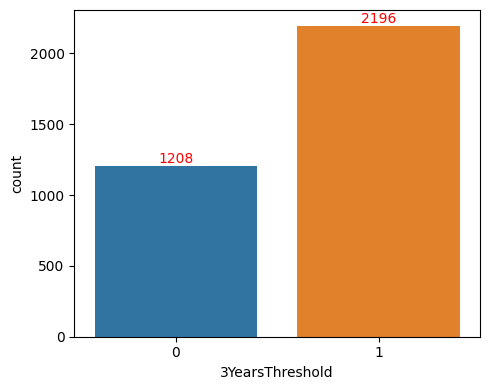

In [24]:
# plot countplot of 3YearsThreshold
plt.figure(figsize=(5,4))
ax = sns.countplot(x='3YearsThreshold',data=df)
ax.bar_label(ax.containers[0],size=10,color='red')
plt.tight_layout();

**Comment:** Of the 3,404 rookies in our dataset, 2,196 of those rookies passed the 3 year threshold in career length.

### 4.2 Distributions of Numerical Variables

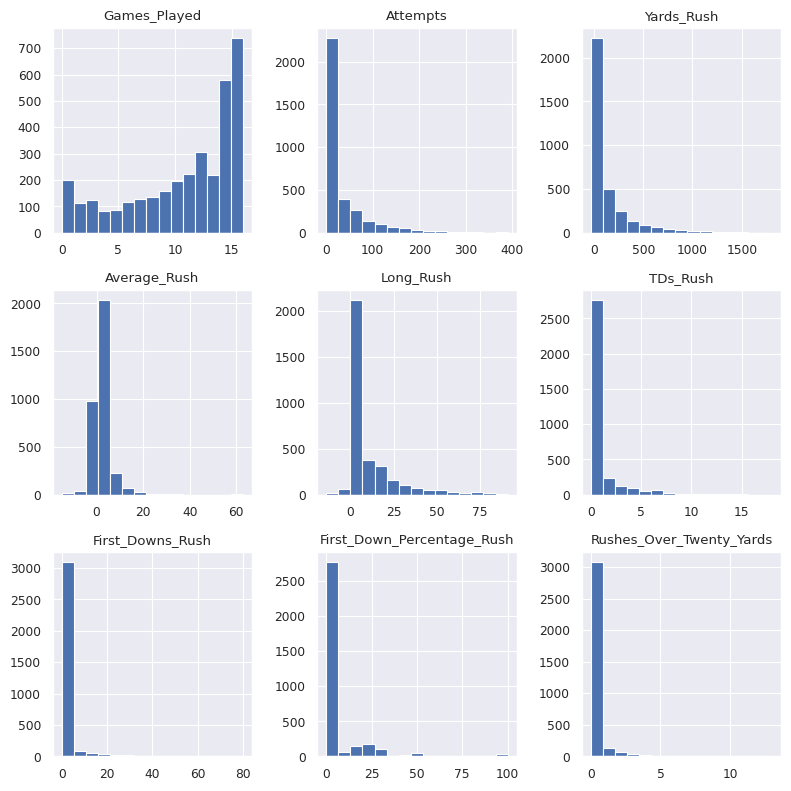

In [25]:
# Display first set of numerical columns
sns.set(style='darkgrid',context='paper')
df.iloc[:,0:12].hist(figsize=(8,8),bins=15)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout();

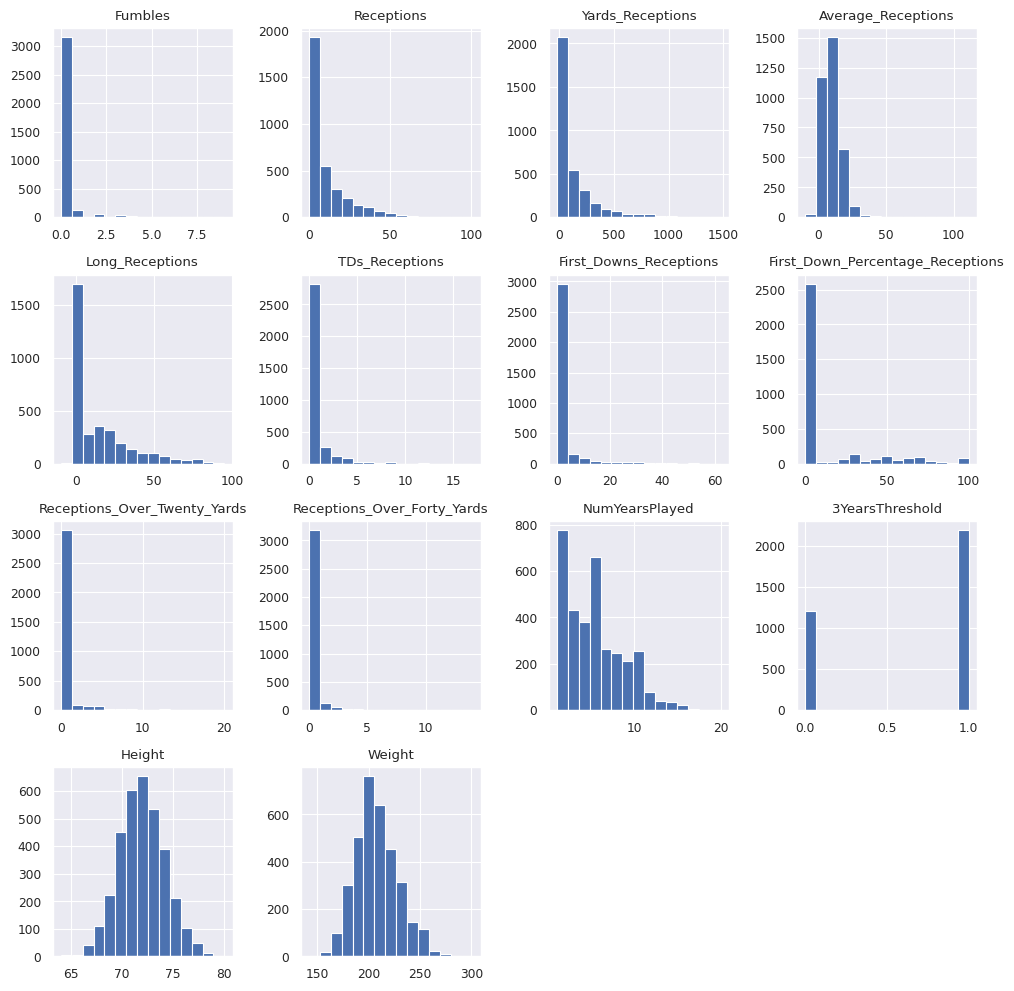

In [26]:
# Display next set of numerical columns
df.iloc[:,13:].hist(figsize=(10,10),bins=15)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout();

**Comment:** The rushing and receiving performance statistics are right skewed. Height and Weight follow a normal distribution, while number of games played is left skewed.

### 4.3 Feature Correlation Heatmap

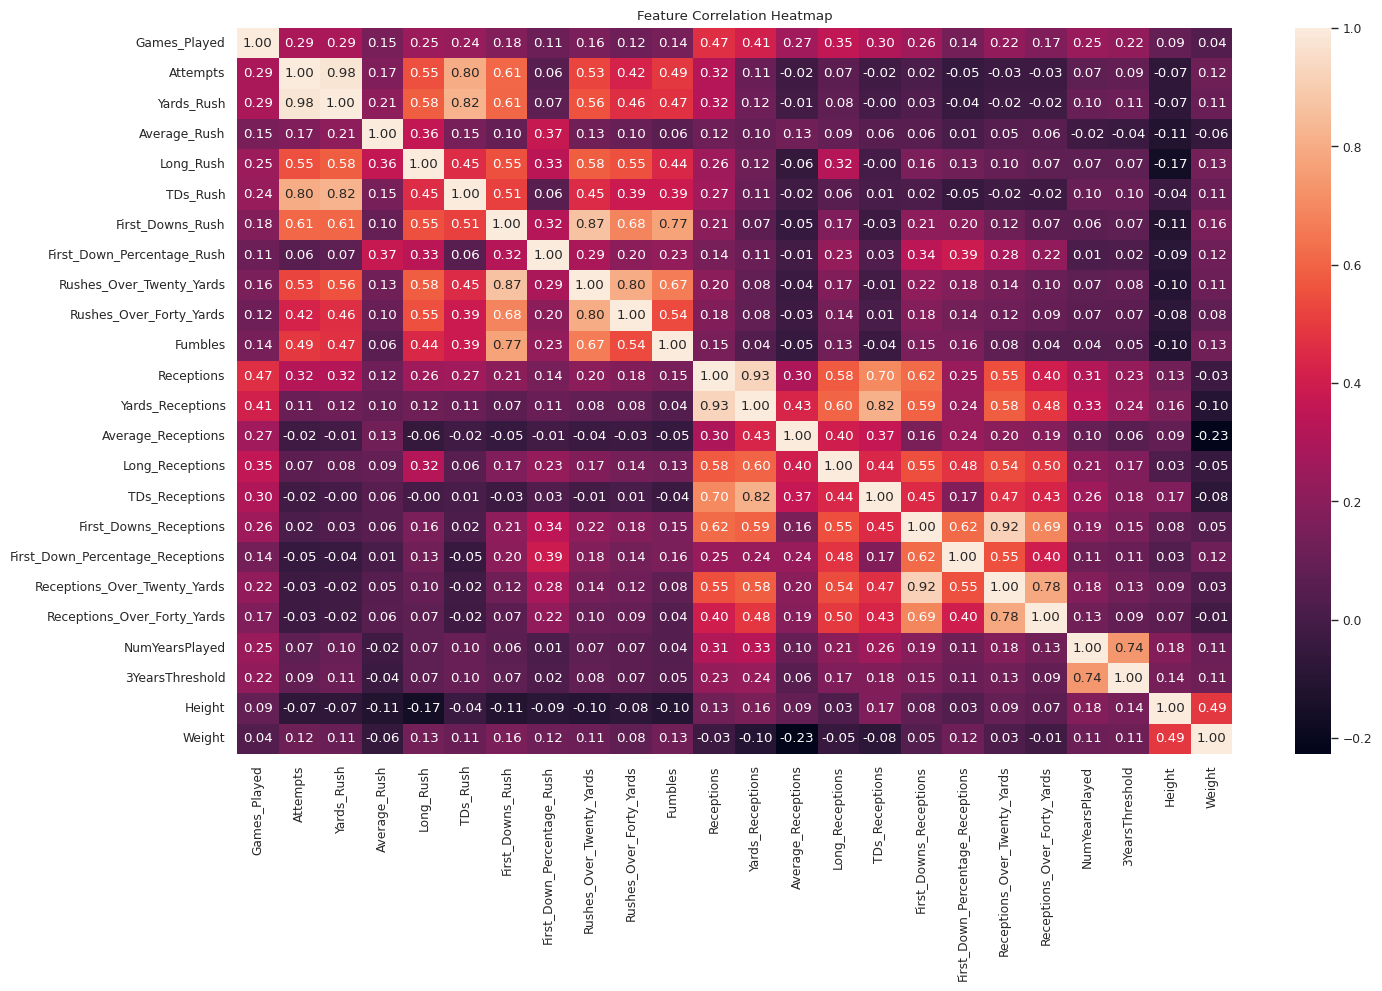

In [27]:
# plot correlations
plt.figure(figsize=(15,10))
plt.title('Feature Correlation Heatmap')
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.tight_layout();

**Comment:** The various rushing statistics are moderately to highly correlated with each other. We see this pattern also among the receiving statistics. We will later use feature selection techniques for the predictive models.

### 4.4 Barplot of NumYearsPlayed by Position

Position
TE    8.0
WR    6.0
FB    4.0
RB    4.0
HB    3.0
Name: NumYearsPlayed, dtype: float64


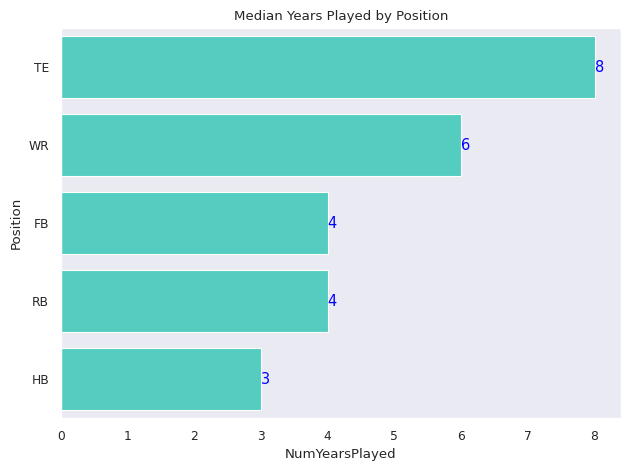

In [28]:
# subset and aggregate by median
position_years = df.groupby('Position')['NumYearsPlayed'].median().sort_values(ascending=False)
print(position_years)

# plot barplot
sns.set_style('dark')
ax = sns.barplot(position_years.reset_index(),x='NumYearsPlayed',y='Position',orient='h', palette=['turquoise'])
ax.bar_label(ax.containers[0],size=10.5,color='blue')
plt.title("Median Years Played by Position")
plt.tight_layout();

**Comment:** We use the median to find the best value for center since NumYearsPlayed has a skewed-right distribution. Halfbacks/running backs have the shortest careers at 3-4 years while wide receivers and tight ends have longer careers at 6-8 years.

### 4.5 Barplot of New Players by Year

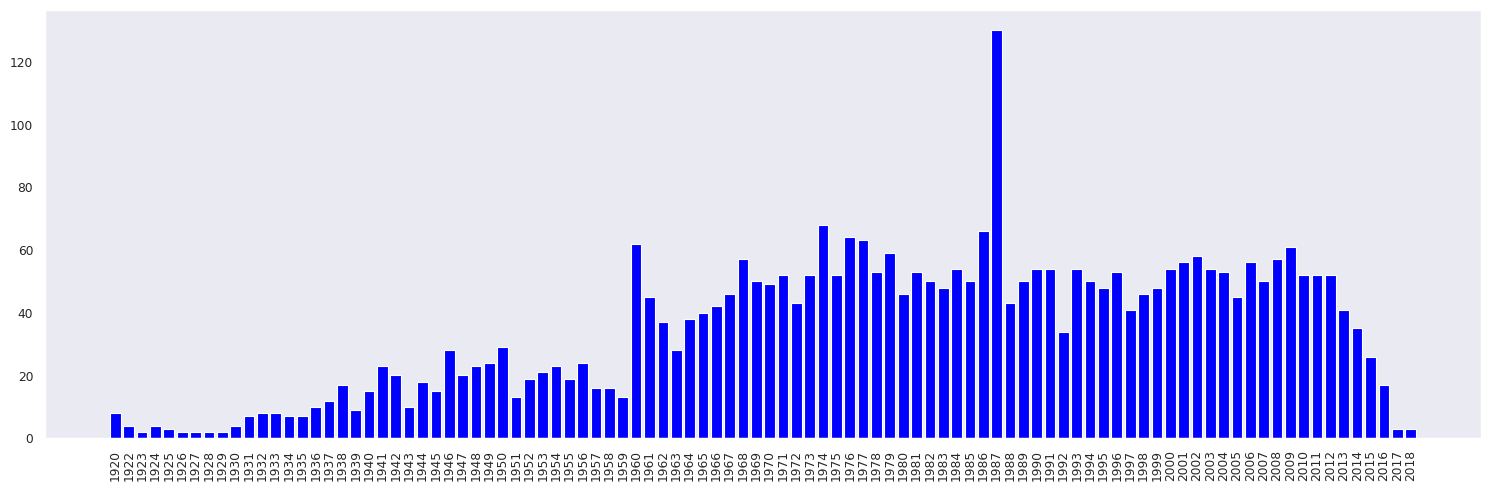

In [29]:
# subset by year and count player_id's
years_count = df.groupby('Year')['Player_Id'].count().reset_index()

# create barplot using subset
plt.figure(figsize=(15,5))
plt.bar(years_count.Year,years_count.Player_Id, data=years_count, color='blue')
plt.xticks(rotation=90)
plt.tight_layout();

**Comment:** Trends in the counts of rookie players to join the NFL over time. The year 1987 seems to have a very high spike in rookie players admission. After researching, this appears to be a result of the 1987 NFL Player's Association strike which saw an influx of replacement players due to unionized players refusing to play.

## 5. Preprocessing

### 5.1 Scale Numerical Features

In [30]:
# split predictors and target variable
X = df[['Games_Played', 'Attempts', 'Yards_Rush', 'Average_Rush',
       'Long_Rush', 'TDs_Rush', 'First_Downs_Rush',
       'Rushes_Over_Twenty_Yards', 'Fumbles',
       'Receptions', 'Yards_Receptions',
       'Average_Receptions', 'Long_Receptions',
       'TDs_Receptions', 'First_Downs_Receptions',
       'Receptions_Over_Twenty_Yards',
       'Height', 'Weight']]

y = df[['3YearsThreshold']]

**Comment:** Here we do some feature selection based on research and domain knowledge. We drop the average rush and receptions columns because they are just calculated columns of attempts and yards (yards/attempts). We drop the first down percentage columns because they are redundant with the first down columns. For the same reason, we drop the over fourty yard columns.

In [31]:
# instantiate StandardScaler()
scaler = StandardScaler()

# fit and transform numerical features
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.13000653, -0.37529859, -0.2965636 , ..., -0.28739476,
        -1.38588921,  0.11586236],
       [-1.82757208, -0.57634124, -0.56816237, ..., -0.28739476,
        -0.91309237, -0.35545154],
       [-1.61631646, -0.59461784, -0.56816237, ..., -0.28739476,
         0.50529815, -0.5911085 ],
       ...,
       [ 1.13000653, -0.57634124, -0.56816237, ..., -0.28739476,
         0.97809499,  1.52980407],
       [ 0.07372846,  1.79961736,  2.17369196, ..., -0.28739476,
         0.97809499,  0.54004487],
       [-0.98254962, -0.41185179, -0.49056272, ...,  0.19955982,
         0.03250131,  1.10562156]])

### 5.2 Encode Target Feature

In [32]:
# instantiate LabelEncoder()
labeler = LabelEncoder()

# fit transform target feature
y_scaled = labeler.fit_transform(y)
y_scaled

array([1, 1, 0, ..., 1, 1, 0])

### 5.3 Split Train & Test Sets

In [33]:
# split training and testing sets with a test_size of 0.30
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=143)

In [34]:
# print training dimensions
X_train.shape, y_train.shape

((2382, 18), (2382,))

In [35]:
# print testing dimensions
X_test.shape, y_test.shape

((1022, 18), (1022,))

### 5.4 Feature Selection

#### 5.4.1 ANOVA f-test Feature Selection

In [36]:
# anova feature selection function from MachineLearningMastery.com
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

**Comment:** The code above is from a MachineLearningMastery.com article to run ANOVA tests and scoring the features in the dataset based on importance. Reference for the code is found at the bottom of this notebook.

In [37]:
# we modified this section so that fs_scores_dict can be accessed as a dictionary
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

fs_scores_dict = dict()
for i in range(len(fs.scores_)):
  fs_scores_dict['Feature '+str(i)] = fs.scores_[i]

#### 5.4.2 Random Forest Feature Importance

In [38]:
# train rf classifer
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

# extract & print RF feature importance scores + anova scores
feature_importances = pd.DataFrame({'ANOVA':fs.scores_, 'Random Forest':forest.feature_importances_}, index=X.columns)
feature_importances.sort_values('Random Forest', ascending=False)

,ANOVA,Random Forest
Weight,25.765948,0.126059
Games_Played,122.562439,0.108469
Yards_Receptions,164.037910,0.103428
Yards_Rush,29.793872,0.084811
Attempts,19.116489,0.080928
Average_Rush,1.417779,0.079855
Receptions,159.192758,0.077155
Average_Receptions,9.301793,0.076650
Height,44.161096,0.069651
Long_Receptions,79.716845,0.049955


### 5.4.3 Feature Selection Finalized

In [39]:
# subset top 11 features based on random forest feature importance scores
X2 = df[['Weight','Games_Played','Yards_Receptions','Yards_Rush', 'Average_Rush',
         'Attempts', 'Receptions','Height','Long_Receptions', 'Average_Receptions',
         'Long_Rush']]

# instantiate StandardScaler()
scaler = StandardScaler()

# scale numeric features
X_scaled = scaler.fit_transform(X2)
X_scaled

# split training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=143)

**Comment**: To do further feature selection, we used feature importance scores from a base random forest classifier. We chose the top 11 features based on the point where feature importance had a significant drop off.

## 6. Modeling

### 6.1 Baseline Accuracy

In [40]:
# target variable value counts
df['3YearsThreshold'].value_counts()

1    2196
0    1208
Name: 3YearsThreshold, dtype: int64

In [41]:
# target variable value counts as percentages
df['3YearsThreshold'].value_counts(normalize=True)

1    0.645123
0    0.354877
Name: 3YearsThreshold, dtype: float64

In [42]:
# print baseline accuracy
baseline = df['3YearsThreshold'].value_counts(normalize=True).max().round(4)
print("Zero-Rate Classifier Accuracy (Baseline) = ", baseline * 100, '%')

Zero-Rate Classifier Accuracy (Baseline) =  64.51 %


**Comment:** The Zero-Rate Accuracy is often used as a baseline for classification. It is simply the probability of predicting the majority class which in our case is the 'Yes' category. Our goal is to build a classifier that performs better and has an accuracy above 64.51%.

### 6.2 Machine Learning Algorithm Comparison

In [43]:
# create list of ML classifiers
alg_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
            KNeighborsClassifier(), GradientBoostingClassifier(), GaussianNB(), svm.SVC()]

# run loop in alg_list and calculate mean cv scores for each algo
for a in alg_list:
    scores = cross_val_score(a, X_train, y_train, cv=5)
    a_score = scores.mean()
    print(a)
    print("Accuracy Score: ", a_score, '\n')

LogisticRegression()
Accuracy Score:  0.678015608759227 

DecisionTreeClassifier()
Accuracy Score:  0.6267876962105597 

RandomForestClassifier()
Accuracy Score:  0.7178901749378997 

KNeighborsClassifier()
Accuracy Score:  0.68262424466642 

GradientBoostingClassifier()
Accuracy Score:  0.7191436322956857 

GaussianNB()
Accuracy Score:  0.5789167239222733 

SVC()
Accuracy Score:  0.7073921392456354 



**Comment:** Based on these results, we will move forward with hyperparameter tuning the top 3 performing models: Random Forest, Gradient Boost, and SVC.

### 6.3 Random Forest Model

#### 6.3.1 RF Hyper-Paramater Tuning

**Comment:** Starting with Random Forest, we tune for the following hyperparamters: criterion, bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators.
- Inspiration drawn from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
rf_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'bootstrap': [True, False],
    'max_depth': [20, 40, 60, 80, 100, None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 400, 800, 1200, 2000]
}

rf = RandomForestClassifier(random_state=143)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=rf_param_grid, n_iter=30, cv=3, n_jobs=-1, verbose=1, random_state=42)
rf_random.fit(X_train, y_train)

print('Best CV Score:', rf_random.best_score_)
print('Best Parameters:', rf_random.best_params_)
print('Accuracy on Test Set:', rf_random.score(X_test, y_test))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best CV Score: 0.7317380352644837
Best Parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'entropy', 'bootstrap': True}
Accuracy on Test Set: 0.7289628180039139


#### 6.3.2 RF Results

In [44]:
rf_best = RandomForestClassifier(n_estimators=400, min_samples_split=10,
                            min_samples_leaf=8, max_features='sqrt',
                            max_depth=60, criterion='log_loss', bootstrap=True, random_state=143)

rf_best.fit(X_train,y_train)
rf_ypred_best_tr = rf_best.predict(X_train)
rf_ypred_best_te = rf_best.predict(X_test)

labels = ['No: 0', 'Yes: 1']
print(classification_report(y_test, rf_ypred_best_te, target_names=labels))

# store accuracy, recall, precision, f1
acc_rf = accuracy_score(y_test, rf_ypred_best_te)
rec_rf = recall_score(y_test, rf_ypred_best_te)
prec_rf = precision_score(y_test, rf_ypred_best_te)
fsc_rf = f1_score(y_test, rf_ypred_best_te)

              precision    recall  f1-score   support

       No: 0       0.68      0.48      0.57       372
      Yes: 1       0.75      0.87      0.80       650

    accuracy                           0.73      1022
   macro avg       0.71      0.68      0.68      1022
weighted avg       0.72      0.73      0.72      1022



### 6.4 Gradient Boosting Model

#### 6.4.1 GB Hyper-Paramater Tuning

In [ ]:
gb_param_grid = {
    'loss':['log_loss', 'exponential'],
    'learning_rate':[0.001, 0.01, 0.1, 0.2],
    'subsample':[0.5, 0.8, 1.0],
    'max_depth': [20, 40, 60, 80, 100, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 400, 1000, 2000]
}

gb = GradientBoostingClassifier(random_state=143)
gb_random = RandomizedSearchCV(estimator = gb, param_distributions=gb_param_grid, n_iter=30, cv=3, n_jobs=-1, verbose=1, random_state=42)
gb_random.fit(X_train, y_train)

print('Best CV Score:', gb_random.best_score_)
print('Best Parameters:', gb_random.best_params_)
print('Accuracy on Test Set:', gb_random.score(X_test, y_test))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best CV Score: 0.72544080604534
Best Parameters: {'subsample': 0.5, 'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': None, 'loss': 'log_loss', 'learning_rate': 0.001}
Accuracy on Test Set: 0.7221135029354208


#### 6.4.2 GB Results

In [45]:
gb_best = GradientBoostingClassifier(subsample=0.5, n_estimators=2000,
                                min_samples_split=5, min_samples_leaf=8,
                                max_features='log2', max_depth=None,
                                loss='log_loss', learning_rate=0.001, random_state=143)

gb_best.fit(X_train,y_train)
gb_ypred_best_tr = gb_best.predict(X_train)
gb_ypred_best_te = gb_best.predict(X_test)

labels = ['No: 0', 'Yes: 1']
print(classification_report(y_test, gb_ypred_best_te, target_names=labels))

# store accuracy, recall, precision, f1
acc_gb = accuracy_score(y_test, gb_ypred_best_te)
rec_gb = recall_score(y_test, gb_ypred_best_te)
prec_gb = precision_score(y_test, gb_ypred_best_te)
fsc_gb = f1_score(y_test, gb_ypred_best_te)

              precision    recall  f1-score   support

       No: 0       0.67      0.46      0.54       372
      Yes: 1       0.74      0.87      0.80       650

    accuracy                           0.72      1022
   macro avg       0.71      0.67      0.67      1022
weighted avg       0.71      0.72      0.71      1022



### 6.5 SVC Model

#### 6.5.1 SVC Hyper-Paramater Tuning

In [ ]:
svc_param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svc = svm.SVC(random_state=143)
svc_grid = GridSearchCV(svc, svc_param_grid, refit = True, n_jobs=-1, verbose=1)
svc_grid.fit(X_train, y_train)

print('Best CV Score:', svc_grid.best_score_)
print('Best Parameters:', svc_grid.best_params_)
print('Accuracy on Test Set:', svc_grid.score(X_test, y_test))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best CV Score: 0.7149551644557194
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy on Test Set: 0.6966731898238747


**SVC Hyper-Paramater Tuning Results:**

- Best SVC Params:

    * 'C': 10
    * 'gamma': 'scale'
    * 'kernel': 'rbf'

- Best CV Score: 0.7149551644557194

- Accuracy on Test Set: 0.6966731898238747

#### 6.5.2 SVC Results

In [46]:
# RUN THIS CELL W/ BEST PARAMTERS SO WE DONT HAVE TO RERUN RANDOMSEARCHCV
svc_best = svm.SVC(random_state=143, C=10, gamma='scale', kernel='rbf')

svc_best.fit(X_train,y_train)
svc_ypred_best_tr = svc_best.predict(X_train)
svc_ypred_best_te = svc_best.predict(X_test)

labels = ['No: 0', 'Yes: 1']
print(classification_report(y_test, svc_ypred_best_te, target_names=labels))

# store accuracy, recall, precision, f1
acc_svc = accuracy_score(y_test, svc_ypred_best_te)
rec_svc = recall_score(y_test, svc_ypred_best_te)
prec_svc = precision_score(y_test, svc_ypred_best_te)
fsc_svc = f1_score(y_test, svc_ypred_best_te)

              precision    recall  f1-score   support

       No: 0       0.61      0.45      0.52       372
      Yes: 1       0.73      0.84      0.78       650

    accuracy                           0.70      1022
   macro avg       0.67      0.64      0.65      1022
weighted avg       0.69      0.70      0.68      1022



##7. Performance Metrics Evaluation

In [47]:
# create metric lists for each model
rf_list = [acc_rf, rec_rf, prec_rf, fsc_rf]
gb_list = [acc_gb, rec_gb, prec_gb, fsc_gb]
svc_list = [acc_svc, rec_svc, prec_svc, fsc_svc]

# compile metric lists as a datadrame
metrics = pd.DataFrame({'Random Forest':rf_list, 'Gradient Boosting': gb_list, 'Support Vector Machine':svc_list}).T

# rename columns
metrics.columns = ['Accuracy','Recall','Precision','F1 Score']
metrics

,Accuracy,Recall,Precision,F1 Score
Random Forest,0.728963,0.869231,0.746367,0.803127
Gradient Boosting,0.722114,0.873846,0.737662,0.800000
Support Vector Machine,0.696673,0.836923,0.727273,0.778255


## 8. Modeling Scenario: Active Players
- *New datapoints to feed into our 3YearsThreshold Classifier!*

In [48]:
# load active player data
active_recieving = pd.read_csv('/content/ActivePlayer_Receiving_Stats.csv')
active_rushing = pd.read_csv('/content/ActivePlayer_Rushing_Stats.csv')
active_basic = pd.read_csv('/content/Active_Player_Basic_Stats.csv')

# data wrangling steps
active_recieving.drop(columns=['Team','Games_Played'], inplace=True)
active = pd.merge(active_rushing, active_recieving, on=['Player_Id','Year'], how='inner', suffixes=('_Rush','_Receptions'))
active_df = active.groupby('Player_Id').first()
active_df['NumYearsPlayed'] = (active.groupby('Player_Id')['Year'].count().values) - 1
active_df.reset_index(inplace=True)
active_df['3YearsThreshold'] = np.where(active_df.NumYearsPlayed > 3, 'Yes', 'No')

active_basic = active_basic[['Player_Id','Position','Height','Weight']]
active_df = pd.merge(active_df, active_basic, on='Player_Id', how='left')

# data cleaning steps
active_df[numeric_cols] = active_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
active_df = active_df.fillna(0)
active_df['Height'] = active_df['Height'].apply(height_conversion)
active_df[['Year', 'Height','Weight']] = active_df[['Year', 'Height','Weight']].apply(pd.to_numeric, errors='coerce')

active_df = active_df[active_df.Position.isin(skill_positions)]
active_df = active_df[active_df['Year'] == 2020]

# preprocessing steps
X_active = active_df[['Weight','Games_Played','Yards_Receptions','Yards_Rush','Average_Rush',
         'Attempts', 'Receptions','Average_Receptions','Height','Long_Receptions',
         'Long_Rush']]

y_active = active_df[['3YearsThreshold']]

scaler = StandardScaler()
labeler = LabelEncoder()

X_active_scaled = scaler.fit_transform(X_active)
y_active = labeler.fit_transform(y_active)

In [49]:
# use best gradient boosting model to predict on new active player data
active_df['Prediction'] = gb_best.predict(X_active_scaled)
active_df[['Player_Id', 'Prediction']].head(20)

,Player_Id,Prediction
1,a-j-dillon,1
7,adrian-killins-jr,1
28,anthony-mcfarland-2,0
33,antonio-gandy-golden,1
34,antonio-gibson-2,1
35,antonio-williams,1
53,brandon-aiyuk,1
67,cam-akers,1
74,ceedee-lamb,1
78,chase-claypool,1


# 9. Conclusion

In this project, we sought to analyze offensive rookie data and build a 3YearsThreshold classifier that can predict if a new player would make it past 3 years or more in the NFL to obtain the status as a Vested NFL Veteran. This could aid NFL general managers in making decisions about rookies based on their expected longevity. Some descriptive insights we found in the process include:


*   The median career length for offensive players range from 3-8 years depending on position. Running backs were on the lower end while receivers and tight ends were on the higher end.
*   Number of games played and offensive reception statistics ar emore correlated with a longer career in the NFL

We aimed to build a predictive model with a baseline accuracy higher than 64.5%. Some insights we found in this process include:

*   We were able to build several models using hyperparameter tuning that were higher than the baseline accuracy of 64.5% including random forest model, gradient boosting model, and a SVC model.
*   Overall, we think either the random forest or gradient boosting model would be valuable models because of their predictive accuracy of around 72%.

In summary, this project has proved that it is possibly to predict rookie longevity with relatively high success and these model can be used to help NFL GMs plan their budgets appropriately.


## 10. References
1. Michel Kana, M. K. (2020, March 4). How to find decision tree depth via cross-validation. Medium. https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6
2. Davis, R. (2006). Vernon Davis. Vernon Davis 2006 NFL Draft Prospect. http://www.footballsfuture.com/2006/prospects/vernon_davis.html
3. Wikimedia Foundation. (2023, November 20). 1987 NFL season. Wikipedia. https://en.wikipedia.org/wiki/1987_NFL_season#:~:text=of%20larger%20suites.-,The%20NFLPA%20strike,were%20played%20with%20replacement%20players.
4. Brownlee, J. (2020, August 18). How to perform feature selection with Numerical Input Data. Feature Selection With Numerical Input data. https://machinelearningmastery.com/feature-selection-with-numerical-input-data/#:~:text=The%20two%20most%20commonly%20used,and%20the%20mutual%20information%20statistic.